In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df = pd.read_csv('/Users/toddhendricks/Downloads/CalomirisPritchett_data.csv')

In [36]:
df.head(5)

,ID number,Conveyance,Page,Researcher,Notary First Name,Notary Last Name,Sales Date,Sellers First Name,Sellers Last Name,Sellers County of Origin,...,Interest Rate,Discount Rate,predicted rate,Calculations,Ratio,PresentValue,DUMMY omission,Reason for Omission,Comments,DUMMY Estate Sale
0,1.0,70.0,348,MS,John French,Coffey,10/6/1856,Benjamin,Screws,.,...,NaN,0.00602698,0.07477,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1,2.0,70.0,349,MS,William,Shannon,10/7/1856,Santiago,Galseran,New Orleans,...,NaN,0.00602698,0.07477,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2,3.0,70.0,351,MS,Edward George,Gottschalk,10/1/1856,Pierre,Macou,New Orleans,...,NaN,0.00602698,0.07477,NaN,NaN,NaN,0.0,NaN,NaN,NaN
3,4.0,70.0,352,MS,Paul Emile,Laresche,10/8/1856,Benjamin Franklin,Irby,Vanzand,...,NaN,0.00602698,0.07477,NaN,NaN,NaN,0.0,NaN,NaN,NaN
4,5.0,70.0,352,MS,George,Rareshide,10/8/1856,Richard,Condon,New Orleans,...,NaN,0.00602698,0.07477,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [38]:
df.columns

Index(['ID number', 'Conveyance', 'Page', 'Researcher', 'Notary First Name',
       'Notary Last Name', 'Sales Date', 'Sellers First Name',
       'Sellers Last Name', 'Sellers County of Origin',
       'Sellers State of Origin', 'Representing Seller',
       'Relationship to Seller', 'Buyers First Name', 'Buyers Last Name',
       'Buyers County of Origin', 'Buyers State of Origin',
       'Representing Buyer', 'Relationship to Buyer', 'Slave Name', 'Sex',
       'Age', 'Color', 'Occupation', 'Family Relationship', 'Name Child 1',
       'Sex Child 1', 'Age Child 1', 'Name Child 2', 'Sex Child 2',
       'Age Child 2', 'Name Child 3', 'Sex Child 3', 'Age Child 3',
       'Name Child 4', 'Sex Child 4', 'Age Child 4', 'Name Child 5',
       'Sex Child 5', 'Age Child 5', 'Name Child 6', 'Sex Child 6',
       'Age Child 6', 'Name Child 7', 'Sex Child 7', 'Age Child 7',
       'Name Child 8', 'Sex Child 8', 'Age Child 8', 'Guaranteed',
       'Notes on Guarantee', 'Number of Total Slaves',

In [39]:
df['Sales Date'] = pd.to_datetime(df['Sales Date'], errors='coerce')
df = df.set_index(pd.DatetimeIndex(df['Sales Date']))

In [40]:
df['Buyers County of Origin'].value_counts()

New Orleans         8809
.                   1057
Jefferson            329
Iberville            268
Ascension            264
                    ... 
Mississippi City       1
Fulton                 1
Donaldsonville         1
Macon                  1
Newton                 1
Name: Buyers County of Origin, Length: 243, dtype: int64

In [41]:
df['Sellers County of Origin'].value_counts()

New Orleans                 8798
Baltimore                    889
.                            856
Richmond                     687
Mobile                       232
                            ... 
Lewis                          1
Gainsville                     1
St. Charles, New Orleans       1
Owen                           1
Liberty                        1
Name: Sellers County of Origin, Length: 465, dtype: int64

### The vast majority of the buyers and sellers were local

In [42]:
df['Transactions']=df.groupby(df.index)['Representing Seller'].transform('count')

In [43]:
df['Transactions']

Sales Date
1856-10-06    2.0
1856-10-07    1.0
1856-10-01    7.0
1856-10-08    2.0
1856-10-08    2.0
             ... 
NaT           NaN
NaT           NaN
NaT           NaN
NaT           NaN
NaT           NaN
Name: Transactions, Length: 14850, dtype: float64

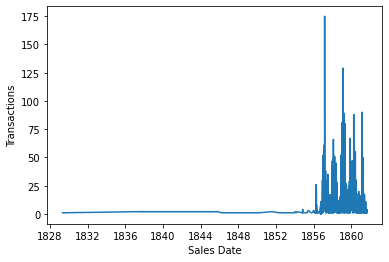

In [46]:
y = df['Transactions']
sns.lineplot(data=df,x=df.index,y=y)

In [47]:
df['Transactions'].max()

175.0

In [48]:
df['Payment Method'].value_counts()

Cash                7177
Cash and Credit     1315
Credit               851
Donation              91
Exchange, Cash        78
Exchange              75
Cash                  19
Barter                15
Barter, Cash           9
Emancipation           7
.                      6
Exchange, Credit       1
Barter, Credit         1
Cash and Credit        1
Name: Payment Method, dtype: int64

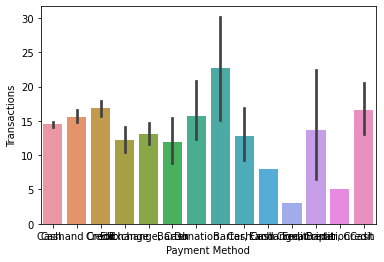

In [50]:
sns.barplot(x=df['Payment Method'],y=df['Transactions'])

In [51]:
df['Sex'].value_counts()

F           7597
M           6996
.             47
M             35
F             27
F              1
Name: Sex, dtype: int64

In [52]:
df['Relationship to Buyer'].value_counts()

.                                      12932
Agent                                    607
Attorney                                 292
Partner in firm                          291
Joint Purchaser                           67
President of Company                      53
Agent and Attorney                        36
Guardian and Agent                        19
Son and Agent                             13
Treasurer of Company                      13
Father and Agent                          13
Husband and Agent                         10
Husband and Attorney                       9
Guardian                                   8
Relative and Agent                         7
Wife and Agent                             6
Mother and Agent                           5
Brother-in-law and Agent                   4
Manager of Company                         3
Guardian                                   3
Executor of the Estate                     2
Daughter and Agent                         2
Father and

In [55]:
df['Occupation'].value_counts()

.                                   14650
Blacksmith                              7
Carpenter                               7
Cook                                    5
Cook, Washer, Ironer                    4
Slater                                  3
Bricklayer                              3
Baker                                   3
Field Hand                              2
Domestic                                2
Cooper                                  2
Plasterer                               2
Field Hand, Teamster                    1
Engineer                                1
House Servant, Seamstress               1
Nanny                                   1
Engineer, Blacksmith                    1
House Servant                           1
Rough Carpenter                         1
Cotton Weigher, Sampler                 1
Midwife                                 1
Washer, Ironer, Tutor, Domestic         1
Pilot                                   1
Cook, Washer, Ironer, Seamstress  

In [56]:
df['Color'].value_counts()

Negro                  8722
.                      2251
Mulatto                1579
Griff                  1328
Black                   349
Dark Griff              118
Yellow                   64
Dark                     39
Creole Negro             36
Quarteroon               29
Brown                    19
Copper                   19
Light Griff              17
Dark Mulatto             12
Dark Negro               11
Creole Mulatto            7
Bright Mulatto            6
Mulatto, Griff            5
Light Mulatto             5
Creole                    5
Light                     3
Negro                     3
Dark Copper               3
.                         2
Chestnut                  2
Yellow, Griff             2
Light Negro               1
Light Black               1
Bright Color              1
Black Negro               1
Albino, Negro             1
Fair Mulatto              1
Griff Creole              1
Light Brown               1
Dark Orange, Griff        1
Colored             

In [84]:
pd.to_numeric(df['Price'], errors='coerce')
df['Price'].isna().value_counts()
df['Price'].dropna(inplace=True)
df['Price'].str.strip()
df['Price']

Sales Date
1856-10-06     650
1856-10-07     550
1856-10-01    1000
1856-10-08    1400
1856-10-08     700
              ... 
1861-04-04     950
1861-05-23     650
1861-08-03    1100
1861-05-07    1600
1861-07-29    1600
Name: Price, Length: 12207, dtype: object

In [85]:
df['Price'].mean()

TypeError: Could not convert 650550100014007006001650120012251100950100512501425100012001400125012501500800500700100010006601501021.3315023012508009751235150022010751200900900120070070012008258009006008001000150900500180011502001000950200127515001500120013001350110011509958001700170090030029725071014005003001300125080010003007458001000125080090014501450105020009001000100135013501350150012001050130013005001300700127550055001275107512008606501200125012506006754001450150011000105011501200800710.77580095010501000500105075012501000120012001900200120512003801200120012001000450122577512251000350880700750400270001000.140014501450125012501501200200650800650900100042523595074577012006004001150250012751400135035070015001500575272512509008001372900117561069540010009254501000800100037202100750115014006006007001200800800300300300800130022008001000150030009501000100011501150450450450150015001500150014001400140013001300130013001250420010001200140012301230123015254005501200750351588015701550890350540110035075070015001400117527008003503000800200400116032009001250250010001100500140019915900200035013251300130012001200165612004004508501400925111012801350210012501170630900600360850750120012501200875130012506507706100500300150800320162511001400140011001100110029001050.7709001200100010005752025950190013501100900325400100079040080070011003501450125015001200160012001300132516001600120012751290102522757005171000100012509608059001450135610004501350240034589015651100300200011001501200400157515751575450110098040016901000100013501450500130014001200140010002000700600120011501300140012009004280115015001500115012001113001300160010405008003001200105085010503001200120050150015001100910115060030025092014001300110095200140080090050010001631.758007501200666.678001000900125010503501503007481275159013501240157515008256001275325154013251080013001214.37546016500110042599010005001350800130013001300130012001000100085080011008007006001300120013001000110085010002500115012001449.855002860130075011501750130021406757601100110020001100800700237548501200167559065014981177200584.1512507499154907308307107201000660650650120060079512109009006008508123400700875500900800115085050060050080012508506157504501000125775800800120092559095090080047513008001150700115010001200100010006006251600789.8512001100115011001050105010509501000.3510009751150100080080052512007007001450180060021082512405601251250750100010001250600400060040060080070045070010257301000900140013009009251050847.28857.258501200800900100012702501221160012009181600540120013502907502000600500100070010001000160100090577530067512001000650140011001150100061439575012005700100080057577510001400120012001200120012001200120012001200120012001350640090011009007501400140014001400700125010509001480800320060085014501450145014501450145014501450125012501250125012501250125012001200110011001100950143314331433150015001600160084042093012001100131010000250125010509758008455007001100107513008006006004004001310120010001075110045020001500150015001500150020015002400415900012501250130014001100250120080072510001200145013009509008001300800810115060040030020075011501300100095037542515014001230122010055012001300100087023001400900100046560520010051100170011508507001100170012003001300130013001100140013001300130013001400140014001400140013001800800700.1125800115082550050078062012001200120011001425142512961500150014501450145012001450120070024001425142515001515112574012505001850170085065010001800110011751600600800100011008807751225120060056040001500.15001650110080016001100105012508001000500110087532533.75150012002757001175875100013001300125013001300152515251500150015251175500800162010507806251487.04337.9660017501000115071010001000300225150015001500150012001400140081580010502000880110010006505004254001200162530051095013507508001000120065010001100253008008001168.33508009361250107518501825100012251275675420300137.51300450200020002000100013001150120012001000835120077511001409752509456201100180012501600425950117514001500150013001200800125065025016001600130014004004501250135013506009501100130090010551404800300090015751575157515751575157515751575131013101310131013101310131013101310131014001836105014001250400125019757751000800600675150010506051300212725900105025012001200143314331400143314336001000100010501050220012002000285077585010001325105011505301000650500120010009005409508006007002000800100013751000800800140500145013501400140014001250135013501300125090060012001375150010006101050900100012501350130014001100145050035050098010018109501200700140040099012251050750950550650130012501300240069011009001150104077595010501600700110092512001050110012501250130012001000120050010004002800102511009758509501200720010003001300.24007504001150115082086090012001000100011007507001500150013001300127512901000800120025301500150015001500150015001500150015001500525710530900120013001300300012001375800950100030087055020008000135010501400140011001100110010005051450800115014251425125083060015001400750170040010008509007005001012.5660150010001000600600115015201050800700140010001600100013009006255301000550110011001150107590010001000100010001000841.41120020010759501200925155095012501150950190014001025200014501000130018001200.1200765119080557512503851425120080013001350120010501150100090053570012001050110080015008001200100060029001420850100300805105060010601300960280080014001105700950800120070055015001550700122512251400330280018009001200230001200125756330080010259002255008003501000150940600380805950130070092539515501550135013508509501000160015501100150011003501600825140012509009007501380630650110073037512501000725900900750300.10001800100040024001500155015501550155012501250125012501250120012001250150015001100682.5900110011751400700650130013001450150015001500150015501550155016001400950800130024161025110088012001000110018745650795600500120070012009502400120011001050650145070090024016001550159015901590159015901500175020001150600500130011501025900.1250132512601450145013501350125080070014001900505100012001225122512251225250060090011001100120090010501200791.5130044257007501200150050014001400140014001400110010509002000125081015001310132513251175120066570030024841100157515901590960835115065511001500120014001400135054001375194414501750110060050080061015501550110012001000125065013001000600400475850950105035011002000090010009650090050097595011751000150011251100100018801275130012508751525127513001000120010001200140014001300300015008001100100080013507501100120021002275120016003005001350150090025008201100600130090590014501350750970115012008006401200100127512003001150250080012001300120013506505001310131022009805609002500120012001600500155015501550800650100015506408007001600820130080072512001200.31045013001100165092570015008007509001300112410006109001025600650200112513008255501350120010001080950662.525005251300115080013008001500150050015001350620120080060077520001300130010504504500800730135070075010502104751251010550560685108013501200800125013001250800125012009001508501200107513001265650120015507501300515600440119012751600600500670100060010001500900600308.3395020006001500110010001000850450100510005050900100080010003508508238904508504756209001000835800110013001225112512001250588080055515001350140025009506001300120011501700140014001400140014001400120011501150120018721000.140700110060012001100135011508007001200110070050012507006001325160013001000150024008759009007507103308004307009859708502255002900250014009007503001800300500900100011301200250550325110100015007251100950120012001300135950120060016001300400.1000900..12001575110010001250400100023008255008756501100594.8113001000450900500800800100070011001200110080077017001100825655013001050145014001350135018001200150012501000600135080013501400700425300011007001007007001250125011501150115011509007501385110011001000100011001000850850850100010001300400570120025063050085012501250900120047512001363.251250900480212070014002000650130012007506001000775400140013001000125010001250120012001250110012001400135012001350135011501050850135010006006008505502508001100350200100030020010002001000165011009607501200900120012507501766.18625825700105011501050900105010501100115090011001000100060012501849.8200015002252455009008508501200115018005000850300800110054910001050120022520585080010008001325120060080045001000100010001500432011001100110011001200110011001100110011001050105090010001100110060012002583.7200125011751175117511751175117511751175115014618.24180070080012001125115025012001000038597557511005002258501300600105012751337.51300300875125015001200900790500800100016009251360136013801350135080010001000940125012501700140014001300130013001300130013001350135013501350120012001200120011001100110011001100110011501050159535014006503087.5137513751375135013501350110024001350700102011251175750375115012001200975130015001075200014001091.661091.661091.661091.6680075010009001400127530045030035011001059105912001000120013001400775360100225980900120011008503006002001450113505258751000825600200900160011501150450.11501500800800700250120090213001000150015002000105013001150600120041515001200130080082512001100100090090095095080010001400127577518502360011001550700650100067512501415875200050080014501450142514001400135057580030013258001250600125014009001300130055070012008258001110182515251000100012001500163015002150400109001200900100070010001508.485010501450145070015002870120010007151200950730137513501200120087570011008006004040105010751270730120058057524020014008001000.5003252400900625150012501500600750500350105010001800140012401240130085010751200800900120080010001350125010001300130015009001000775132513008005651100100012751250105065010005008256606001400140013501350150085057512252751005110030008277509002501400650300800100012506951200120017006001200630800400900650700110085050027001509009001512125015006001250900651.67117513251400141012251225100011102501000750110025014001200120010001150110050012001200120011001000100010809003007001900140065510259001250502004001505550125016005005001360700130016008008257001200800300675950150950403925535120013007200100050055080012503001000105012008151000200110050001200600850832900900900600340900900500600900225010512001200140012510009006501200680875900108010001200140011501100150800750770950950700500950400150125020005601400150014501450145014001300130011506001318.539006811100500..1300450800140080077511251500400411.1285050040015012005001400110014007561150110075075010502150500120010754001000400425100092595050075010001501800800120075090025818.77800350170011502000110040010060010001500480.8003501225250094575013759001350350130070010504807006005007253903508706004000700375113210001000450750112510201500800400225100060010501000990100029008008941200160085557080080040037512007008006507501270500950500800100010501272.151300130011003001200200150075090013001100135011503001000700500800110085050013901250110057550070070010007006004004001500100010005501200325710100085095020001100850125010007507504001000600200250500475242011005008002905857000110010758251250105070093093010001000140050650130014501550695100050090014001150500.950400800120025010001200475700800125012001100700100011001500850110047540011001050900120047540080090010001000500600955900600120050060015001250170050010006401000800110080070014001000475150500110011001000100060050030011001500750150025070013001150105010001000800800600500300120090095085060012001200450250110095010008501300100080090090012003001000100050011003001400600100012001200120070080015007001507158001125230007488.5140014007588.56400825350011502600130012501250125012501250130090011251700100011001200500500.10425501400120012001150110010509001150115011001075190055570013001250125012001250125014001300130012001200120013001300360900150015001450155015501500150014501550155060005300750097550080011508002250070010008001350135013501334133313331250700704505951250120012009001100120010001050900125513009001200360400120090060015006004501000600350180090073501550700800.1163.7290015001450107510501200124570010001200125011006501000120010001350125017001000122511006501000400800130012001400245013501400135014501200120090027300125020001000110010008009851200495400100010001500150015001500147514751475140014001400115011501700110065010001200130014105001350125513001000700775145011006015331300280030014001350137514251450142513751300130014004501300085013751000750105060012001162.5142530040059015003001275135012005006001200700100080090080018009001010800900110014013001500142527100600110011001200252516005109003002704005010001200110020001155120091025512001200120070051025258001000800910925550950120011509009001000120011291200120090050016001000100010001350180010002002600130032565015501400119080095023001200140018001156.411903001320160040027545010257507505351600625.500650500200012001000350105012007804004901508.4250800117522515502000400130010001400400500100011108001400550100570027512008002500180012253006659501125925850140012501757350010501100750120040015002000100025050013453002004501100650250080017207.961150120016001000102575011501000110012001100140010003001150130010501050200015001275105014007003101190625600975200100014001400800100012007505504001400663100055060040010001201300700910315300110070060014001150130085022005008002751500110025001400120014001400150010001518.751518.751518.751518.751518.751518.751518.751518.751518.751518.751518.757901075200013005001450340995105095025008006008006501200135010008002301500550100070050081580020008751500100020010001050120087565010501000100013007001000100010001200800580500400750120013001200522.523012007501300120085012508001150105045735.3314003509001000100010008901200135080019500100078018009005006101350120085077050010008359009008001200115012001200100085050090026085090090050058062513006001450110011009002501300715.41125300010002552.2112751250900950250150045025065010252000130010757001000100062530022513001550966.456105507504507415110011251600117513009006005001110100013001250100012001572112011851200775675900125012009004501050120012501050775500670800350550100070013508501300630566.66566.66425500500132015005005501550145075012009008001300700600750700500100018007702700900900850610140090055013001250300700950500140080012507001000112562547542512512659009009001100100010006001100110090010001000800976.1750065050012503501596.46700160011003358001180102014502700150010008001000900102510500132580012001400130012001400130011501250140010509501100115010501100140014001150115011501150115010501100130090011001000100045024900120055051225150099526001350145080083112008504755740900300145014501320121012508501050900120085090085010001100120015009002501225130013001300115011501300600700400900375330011506505307001350130014001300140012501250700410120013502200130013001300130013001250120012001250130010001000120012001100425160072580013004007001000100016000150070013752258501000858.91500550350950650100012507504954001100475400200850300040014008001500110010003001000600550100080040030014501500130097522408509001050305130050020011501000400130012006001575157512508001250350500150012001000200850120012003003501200800970275775100130013001250125012501250800910110033010508001400200090040014001400120012751275127512751275700130010254001000900110020001200147580020010258752500580265075010003001310300060012002000142514251425132512751250.11209101600100130011001600900178082560012501200120010004501000675660400120060090040001001000800125070090011006757753007008006001150300130015009257504001900410145012501300120013001100100010001200110015006008001624.66800137012006008004972.491300120011001100130012251459.912751225750800700610950650900800100011001100110011007259506252250105014001250125095090010001130.70010004355001500370010505407002000200025002025400105025001900675140013001150115090010150077513001030950220014001200120012001200130012005003001200135013001250115012007001200900120011001560167510751000100012001050120012006401200100010004001650915925250125026509506501000110016252500168511205601340550390014251175100012001200600850850900116690011002030013001500100039001110162514501508904008001200100053.5305825130011008007001200150040013001200110011001050800133075075035010001500650200680247235001200800135013501375142511501500105010501450110012001600100013001150110010509008801600110010001200688.77750127085013001300130013001300125012501200120012501250125012501000115011501100850100095090085070095070010001200300400160012001150122513001300110011001400145014508001000150012001520500750120082578087570050080016004007506241714.28110090011001200120010002550850500800120014007009502448.071000980150014001150130011006002100.10004751500190165010755007001060157518109801650245011251300900147525095080012001050600900800850840110014501400193037585025002424.8785560020501075600900110010503257002200110085067580085040067571097040090012001400186018901000120043016501750500114014365001175120080585020002000630150014005501300100015008501000250250500600300130090011501400300800845275150062520001300130013001300145014501450165011007001216875130012005001275120014001600900200880400110043501250122510509751550155090012009734170050010007607700130013001325452501000975117515251375135013751400137512001000900120010004951200130011751385.75600330400375175600850105030001550115038007501500150014501450150014001400135012001200300600500135060040020501200825925100010901075900600500725117540090012001400107512756751700145014506001200725514.5137513751375127813751375137512781178117815010251050105011501700750075011001363.33900130075015253002300150015001500150015001550135013504805318001200900190052510501800140070013501350110012001200145013501300120015501350100015501550155015501350140017001400140014001300130013251325122513501200120016501650165016501650165016501650155015501400200700500130090035020016505007001050115014001000101060011502000700170015501400140015001200120010002300100027003000100012006502100160030016002002750110042565013001700157517001575162516001600162515121300290012101650100016501650165016501600162515751625160014751500145014001275127514501450135013501400140015001500150014251375500125090012901005001525125012009506001150165010001300100012003501500125020001350145014001000800202016301010500800950250014001525152511001400160048001450400700175800120011008004901300200016001375137515002000110014501050800130014508001350147060013008001500130011708006241050150011701420100012001525550162514251475147515001500150015001287.5145015001500150014501287.513751400100010006001200165016501600150080011701750140014001600170010751000110025001000165016501650165016001300500110042511301230135011501100100080080090070050030015013951000220014001650155013251325145016001600160011001200135015251850165015501500150014501450145014501525145013501275150015251500150014001400800120014001340220010338009002001500135012601400135030000150021001150164090011509255001700195018008002450450140016501501050120011001500900300.5008705009001900.575727512008501320130014901510700130013001300130013001000800800130011251500135013009001400160016001600160012501200800157517001200725110015004003501300880100060080012001400165016501625162516001600160015501500140014001400140014001400140013507001000700500250012001500120012507007751200125012751350100013501350100010001100115012001250750700140030012001360800112515001250140010601250232514007001400200.1050800130085087514758801200600900102515001350150012301250120036009501500450115080017506001350100015001400145015501400150015001200120022501000325100100077516040020041040050030050090060029514003507501350100012001450155079512007651500120014251350.88583212008001450775500130024001000120010002002000110090015012501250120040017509602000116011601166110080035001000800105012501200105090080062530010551150120010008001230115050013005801050168.33168.33168.33168.33168.33168.331000112015001050135013501350120076034011001100650550135012052150800125012501250120095095012501250120012009007009401600150016001400800..680834.680037590050838.6670077010001000200014001150850102010001001001690922.522501309.37120014251325650100010006001000.95050013501150900600122520251125600142513501000850600.14005001000.12101000150070025014001500900670300040090011006756506255101110920991.258501050750300915850140011585009508505801500170010001350120012509752001100700120012009001500120013504005001200900100012009505001600120012251001300120010501400120013002000525800900272565080016001300850350265011758501150685950950.650120030013001000125012501250125012501250105010501400900100012001000575140080020006801325300825115051096010001450.1865010508006658202000300600160016001600140014001400145011251560105014001300115095013902001290140013001000100012501025300800195015001550106014006009008005001100242511001100100080012007001400310070012001100230014001300130011001600800800100014003507515751575157515751575110020009001000180175125040016501550165016501550155010001150110011001300925500102523333.3315001500150015001500150018001400150016001600155015751200152513003253255003000150012501350140010006004001400140014001400140017251600150014251425105022001500130012501400.450260045009001300100090025002000125030001250100025040012508752100110120100027512506301550100040799.94162513501600160017001700170016001500150015001500140015001775.900660090022510501200800120014006001425115062097513417501205190011751300700100016007507001300830125026001000137510756501450151214002500900335600900130012001100110010001300850700130012753675405053001000135050011001500110095010003000800785145014001050265155014001300152515251525155014001250130011601650120011756251550155015508254001200960011001250142514001825120018001500122513001800150016501150700600426001450165016501600800400140016501800300150075014451500120014251200115012407158005501390100016501650165016501600155015001500150014501400170011504001525170015001500150014001650100080010001000800500650100010007001000125512005008007752450111015007008008501425493.359008001445135011509201500135516625150011751250160040010001100970129012001400550140012001000120065010859751625114070070033001140115014503500160010001020150016005254505705001600135012501300130012001525157515501550150013001400140014001375112513501375157514751475600150011501500150015001400110015002600130015251400120015001400115075036512008001130150012003032.6411506001000450027007501201.7557515001300145049012551480150019501100600500145014201380150055015001300152515751575250016001525152514501130130060012001200900120070070040020080070040030020001300400300200150012003003001500100040030013007003003007006009001300501500130040020015001500200800800150015001000130040050015012001501600150010005001000.2100150010802084010206303503700160012002000850800790120014585602150700500260012001600850850120025010001000120015007707001000300137516501350135016501650165014001400140014001425142590014001130605600145012001450100013501150125015015501525120070055080040013507501500206513001225130013001350145014501500140013001001944130013001350120011507001900157516000600110090012001100700150012005001350900100010001500800130095070013501050110080050012501200700887825202515007007006001000100092522001248.81400135013004003001200800625600.152001350100011251000105010009509001150120012501250122512251175110095090014001150950120060050005006957001000.10008501070125070011009009751050140211508508001025120012003501090160072080010001000500820680777800100013501225640100010401000925427510001000800144010045012501000115050080015001400710120055050012002100150013261764.931100425425950102510001015750800700115013001050125012001100289.251500110010005502600870350120012501160105085012502450120013001975110015003008671400900115010009008454002044.75672.23123512351235123511004008001150110012001210.331300900120026309001200130012001200105013501200100016001501650750120040011006121100500115012001000120040095050023001050.15008001500100020012001450400130010002000750700800120014001200230045010001000700500250010308501050700140070060075075028501300990800.1300130011001100975625160015001500150015001500150015001500102516001400700135080016001600160016001500150015001250.1800115014301375141014101350135012505300900120012503503101250125012507001000105070070090055011004101800152514509501000700600900140014001300115095012007501020105012252825120016001600160016001550155015501550150015001500150014003000140068030001325130060096917001200700122510009001800.95092512001050100014001400135010001150400625800160025011001450550110060030010001000100080090091075035095010001500120017258051200550100095011001717.331717.331717.331300877.5877.5877.5877.5877.5877.5100530040011001000.6756271650165016501650165016001550155015501400145014501400130088079518725001600140014009503583.75150062526012501500900975110015581558130710009008151525152515251525152515251525152515251525152515251525152515251525152515251550140015501600100155015504200142590095018001400995520016203001675157514008001650162516256751650101080041513101250155015501000140014001325165070014008809001675165016507006004501000172517508357752525220015001500110017001000140012501001000230010001225925135014001200137513001300450250065027501550145012501400112513501450200014002250102515001500100013007501600145095011751200135051513801160110040017513502500150015001800130025080011501150115016251425142540013201100220010007501400300041408001550120097515001600145014501300200015002150800147560012009001500150015001500900800100045075014005502001400140012001500180075011501200395160013251200750670960142517001000118014159009002100130091513951190107514001175680890130017001055180025014509051450120011501200120091512501150100060090015009501410141014101410141072512251000900700115011001525120010005001200220016001080400050016501550155015004751250130050050037820.652608001400140010001400140012509901300975800475120012001050150015001100160016001600160016001600140014001400140012501700100015251506505040050010009001500713.812501000125022509001400700450105014008003001600710125070501600160015508007002000115010001325700450152514758501100195015001500160010001225120013001530120070050015001800190010009006007008309109502001675167516752000162515501600142514501200120016001200120014001500120012501350130013351100200024001825160014251425142514252650650800400875152513001700189027548301075300950125010001100900132616509001600130013505001500147511001700100017901506003506001500600140013751375150015001300600150037565001198.895035060003850115016354001000135012501127900950950140080013001375120085012101000112515001000180020002600123014001125122587510001500103016501600125020001000137513501375.1500110013502200100040015002200..12001060125012501020.17001400270060016006001200260075015001500800106010101100140010501600125011751475130011001275140015001200750012001000130050012501300260015001400110063015009751400300100017911000120013501425240097578013007259601200120015508002501325616.6766040020008001350123013001300135080040075014001500145014501450145013501450130014001300145013001300135013501233130010008751000800850120055010006325.731300250.120060020002001175.88102560015001550900110017501075100012005257509759301650135013501200110010001100555100015005101000460120090014001400200010001105800135012001000180013757706507001000150019002600260016001300135022004501050241012001250115018001350665800400137512751400300150038510001990260025052527513255001500100012251501500400150014006504.12132510009251525450100014001150130038001480100014001501675167517751775160020050233.33 1/31550800140017751775177517751700112512002646.671238295155060022201100190080017001312.212001200950150010001200120065016501500180016001350390014001600200015001275170016001760176017301725172518501725172517251700167575017001000150011505009001050165035019001300586.51800120015508001250160015001600135070090080060090015001200200012002756165016751650115010001600145014001550800975155015501218.18140090017002551625162515501500310014501450145014501600165016501650165016502500200015509501220145014001600140014505508001220565150016001600155014508501450135014001400875120024508001300985140010008256001300450120080017001650110092532585013501450165016751300145063613001250145014501500..13002900142590070017001700170017001700170017001700680012507001500132524002800.10001600150032001350107015001025165030012001400150013301885.5900150011001300350120012001200430205165044012051450167445010009252000220014251000125180080080012001000175017251700170016501650170017001445144075013505757001300900300020001100170017001700170017001525152515251700500650150020001500900640900330017001400115012751600750150012501000135014757506254502600140065017001585625400700160030005503501700155013501300340012001100160044001200145012004501175100095019001324170017001650165015008001000157515751575157515751575157515753200140050014002400225012506001300167516751105172517251450145022001150115019001550180020001600160016001600170017501400210016751700170017001800180018001800180015001500150028002100100014001400140015001200500400160012001500182516001200165012501250145026001200200150030003000700160016751675167516751675167516751675167516753300167516001600160010501440160010005508008001725182535001300125016007501200700041003000140010751400600250018501850175018501850185018501800170018001750175017001500150015501650160016501600165016501650160015001500.170075017001750160014501300600350150013001500100070015001650135012001000800200.8001450200015001500170017001700170017251725290011003021.8160090011004501200155001600800800500160017001500145050015003600925150010454002501450150010001500110060010001650165018005001150100105090066291.43123016751725170017001675162516501550180010201550125015501500160015001600140015001550145014001500277530001510120010005003001450160015505001500900799.357601500600155085015251350145015003001300200600650130015001350165015001625850800110013009501500230040014501450130010002000150010001500500100020001500150080085011001000135014001650165032861000500750147535017507501458102552515004004501300107555010001200105013501250130011501300150013001300145040020012501247.3580011001100900130050095018009754000900160015751575700145016501425140018251000145065012005001500110010009501200175210120015005001400800140070080085014001300740002425.22460200012501250120060014009528001090150050180020008004956015001500145014251425142513251350120010001085130055050014001005200085095013001000240012501400110077582510004300170013001300140014004001000150050010501300400400425820460110012001700160020002014501300120014001315.1580100030060014508955001250120011001500250022513251200100013501700135085010504302509508740120014001250400322558040020004501000.330012001150125011005086001100150030020080090015001500980600500175017001000620011505100060012001200120010001250925..80010001100120015001200250010005800600120060012001500100016002070410300900750765130018001000100033501200270015000550825100015005001400800600220150075097520001735190040868.1112001000120065010001450127511005002400160018001700165016001600135015001400102560015009001000118001400125090014001300110014001050120017001300140018501850120016001000200080012001100120080070040020015255008001500150017501750175017501750120095517501700568900400165018501700180014001750160013721500850200012002500100016001600150015501600175017501750500150075075014004001750810125012001150175017501750175017501750175017501750175060023001030130019401150760014001150175016501525152515251525150018009001000850100070012001150100014001500700132515751625160040070070012001200150010001610117517821847.331913.33165014006361200800145016201100300120015001500100025001775172533000180015501090150013001350400155014001400167518058501000200013001600140016001700170011001300120085013001050170070160038253009001600160018001550100155061085015501400140015001200140050040087527519752200440032001500145014501450145017001400160016001600140014001050900900155014503000900102665067517001700170017001750175015001279.33400100085080065013001897.5375600200014251800200080015001500110016001500250015001025800100012007751650180010009006504752600100017001700170017001700170014501450145014501450140095015501400850052590070014007008008003200130015501050850100010001350128014003206752001520110070015006001530153055015001400100016001500170015001200125015001100150012503260170016601750100075014004001600140080017001600140017001700700150015001400200140010001450026005000150014003323.252736.751500200015001000255012001500150012004501200120020001800150040042570014001000465018001250675925600910150016001400120012001550170016501700150017501750175015001550155017251725172515001600150017751775160017501650600150060070013001500150016002500750150012001000150066014001300115011505001200300150032003933.331400100012001800100013001000100016001600160016001200145020001600160016501000200013002500120090030020001200100012008009001725172547513001200172570045013008002000240032501185135011501400800190050030015501400230010002800485170010301500155012001000105016501775177517501750150079020015251400120050013001300130016004001400120015001100875400675150030080024601100145012007661300130027009008007601100300120050014751200155015501400125012357509503009007501000150014501600900190090014001300600500151210253200700140020001000110040015258001550140029504806501050.900600210080080716001200125016001250100012001550452515501240120013001110875710600140014001050950110012001100100014001085.71350105041028901500950300500130070025090014501213.758501200100025010006001200600700500100090090084511251550145035001200995110010001800187018701617.41617.41617.41617.4154515451545154515451545154515451545154515455501000107578080012002508001000450825.27001050115010009005101500119015001500145014001300125090015001500150015001500150015001500150015001500150015001500150040010601350800300120010751050100014006007501250100012006001350100012001600205600580.1750030004508259001500100016001200310215055509205008401570960237515101150642.831353.33320010001200.15502500130015502720.51400800970100015001200120020006501075110030013001250900100080011508001000500120053001250145010755009001300380012007001580825140012252350200050063015001000475180012007501655001500150015251200900250055775017504001500100090012251350700100012003001416.75600700160025015501800122564258002602602510103001350100013001500135014701300120012187001000260015002295180070075014165050100014501530180013301100120082512001700720128010001100125025001130120012002000350107535010080015757001000120014506501250155016301900190019001900.310017001530115010004101250850400100010001000140018004501550155016001600160015501600150016501800260010001000800105017001750175017501750155015501575157515501550450160014001050170011507001500100070080025001150122511132153014051650165016501550155011504001210200026590013002500115021501600230015501400130094915001250125012505009501050155015001600160016001200115012507501800665140017001750100016101610170017001650120012501150140016501500167513001700170016501500100011501600155010001150100050090011001350141016501700950138013001000400140050079516001700160015501600160016751700150022001675160017251250270013501770170014501400110013201350213512501700850140012004501200150017501625.140010001650140015001600140010301389.371600165040018001800180016001675165016001000107590011251080180016101650168016501600155015501550160015007001500500..17001280100017251000140012001800127528001475310016501550155015001400166016601660166016601690135013007501660137517001700170017001700170017001700170017001700170017001700170017001700170017001500510014501000700850150013008001250140016501650165014751400325200850500450450160016001600500600145018001250437.338001502790183616201684.681684.662768197217981983.331808.33150020001500150015501350135015014501500300012002501560120040012001500140010501050700170012001550125015001300170017001600160016001700165016501650132515001500700750160011001000700100016002900145011401600152512501300250.13501000900.15001550155018001612.5155017501700100030014009003100140027001650168501600160015007051400500012001700165030012501200125016001400595150012000400.600120090012001350140014001400140012001000120013505504003502001700175020008107502501550170016001700170017001590159015901550149014901550150045098010001100122570022001800300570160017501750175017001550167515002500010001500170017009907251800100012258001200120070013004871200500.115013001250180017001700170015001500130018001600140014009001400140050050014851700341017001350950160067510007003006501400.160025030004001600509001095017001550.10001000200100240095070015001500160012502258001550120021001400950110015001681.8413009001700100030013001800170019001450110018001600420950180010801600108017501750200950220020009501000150021001000102542508000180017001750160016001550150015001800130014271625260015001400165015001775177517751775175017501550180014001450106010251090130090030020001400165016001500150015002000160013002775178060087067525001000115010001350116513501350135013006001350192515003400150012001150160010001323300100012509600100095010251450145013501400135012501200600101075020001550155017001700165016751675175014008001525120012501090.513002000130015006001160101025751100121010756516001200200013751625160015751600162515002100135012501001200120013001100960180013506002250150050001000900140060045025001100975132528080014754001500850155018002100142510001450140012001325150012002325100010001200900100014001450700160015001750110072550069010807501050200010251125800187511751425600925825120090010751550155016501650425160022001200140013501250130085072550010253251450120075012008251150112577575050015006001475675725875142511001100142592514009504501500130045001700600135060075080010007001000150016001400240032251700120085012003001250100024001435150015005503001502502701800375150013002000120015751575170017251000190012001385.116501500260044001900122516501300900165012501350350900750100010006751300120050010001900900550120010001250110014001500120090016001620450100030010001150650125033752756001425135012001700750737.3331500180042514001800500120020007001450800152514254001000385105014001700170015501250153052510001000115040015002300136010007501600120013501501600130011252102350600135015007509508001250925100015001200225014003251200120010001400700.11501250650160012501400164060070014001550180090028001300725110012001200350080011001700170017001700175015341533153314001350106040014501200115095080050016001400900600825333082510001000220090040010007505307001406.314001100140013001800155012501400105018001079.7950070082516009001150130012351235300220015251429.547109901250130011502001100150011055002000110012001412141315002175130014001000700100077512006009001275127512751275100082580090013001000105050080060090013001000750135070010007756801175117512801050775140010007001000695110060021006001496.38200800140013001500150080012501275750132519001400115015001000250050002706001450700700730100070012005057501100900120060012502008001109.181700500780150012001175122015001150750150010006001350135011009001079.79152512001200510.78450165011001900140011004358201350135013501350900165026519251675100013009001500255080012101300250950850215030020251250140012753100150012001600430010001400310014501000225013503629001500160062517001500150014752775255010009001700687.5100015001800180017006004350100040001450245016001500100097511501050900151216001100110010006001500180020015009859501075150012501500900165015001400120080060515002500150080010501800200175015001300750145010001225100017801280200015501100150089011803958501200135015001550150140015001750110012002200751900110017501800115018001800150030036001450120015001800160015258251000700154501600110070095010001025130017001650165016501500140013001300135011501200120020002000100011007008001200100017001550165016501600160017001600260013005507501925120015002504501900120010004277.7160015001000.1050300016001600160016001400140018001700165016501500150015001500132515507009751000120011001250150016008002300175017501200200086445023003000375850900165016501650165016501450130016001150115013001000180017501500145015001500115010001200950100016807001300120020001000900340012001450127510008001600850400100350013751300180020001650110017001466400150013001206.7515501650150014004001200140013004609001800147513501400500135032501200675235010001000180011706001000150091018003200.50014001700750550170016501600160013501400106020003008004501225165013001675177514751500152512001400110010001800180040050060015001175220010004501400850140010008251500135090016251300237590010003251300125037518001250600170012008009006509501200155013001200900700180030013001550675100050040016002175104020001800400151200900125016001000500140010001531160012501680100060012001500105010001764.2412001000500130011001200125030010006006751300150010001200120080010001200160045007001650120012601250650150013501200370120015001095650500650335020501520.89350100012002501000140014001000230012004501500550800150090090010003001200100012002005501300600750117512001200160095012501250775625750130012505001050300015005501800100011259801400850120012001300136020001000132524001800420300200011002550145010001200250014501650165016501650165016501600155015501500150014751475147514751475147570015501650112510252671000550775170017002200150085016001600100024001000150020065015008008509001400800455180025010001300150010007701300275120010001550135059010008005001200120010501300140014001400140012001650750130040010001459.51459.51459.55002523.251150400135090022012509009008001500700800115013007501235130090030514851150700130050070010504001437.5250250012504505301300150015501500120012001515800500600140014001450145015001175117570050010005001080108010801550120010001000240012006506509509751100725115033001000142514251425142514001400650400800150098029002002001822.12900445150010308708001000600105010309009001800840100050025001200120010501500200011009001000104010759001600130010002500225100095011503100146014501150650200017251400142513002000125011501400177511501000200012002650180018251518.751581.251125140022001500800390400775831.261000925.251200800140012005001000141017001470135010012001400103018002507002500450120013503500400925500110011008001325835155015501700170017001700160016001200100015001140119099047570020008001250115012008002100.9254001325700280010001500150014255759001225525111026006552501800120010001450186300800950550150090012001200120012505005007559008001102.5440083050710325800257560513505001725152515501590152016001440130020002001100250017001800170012002616200025002000190012009004509002477.612501500750156014501400600150048315001439.170018001362.51187.51400630440150065012721050180014007508200010502500100080015001000165016501450145015251720172017201720172017201720150015006275009009001500200075070015002000170012001860.183757001250185095040001477.9416001400240040016008501500105013003202501000145075013001250180012251236.151000750700350925130020049082510001200340050011501275224001500120015004000132511251175140017001700170017001400300095014001025170015001500780200012501400150022001350155015001200700250090011001100900400105011501600140016001604.718811000150060013001000200360011501400650950250035082510506003300140018001250225020001700170014007751200260012001800700775750120012001000600170070050010001650500100015002250110012001300110011001850100010001450120057001650109014001600.17001272.28900800150025012005001500132512001500960013001250140030001000100013003001100100040040013651425142511503251000290015002800130015001700600140014751400130013251006.510004451000100040015001800140014504901125100012002000110011009001100800700975800130010508501300300010472000150080095021502000155013682732160411003501400190017001600160014001400140090060020015002501501300107515001100250040012001021.751100150015002050140015009001610120010001200700102510001250700500.600121060062520002450560920300975432.7175010001150120013007502000110012001752350160014002503146750750.20756002200150011001200137590011501200165014001600100017501675167516001500150010502000900250012009301250160010251500125012001100130080017001700170017001500160016001600110012006005002500150040001200170014004501500120080014509601550100014001500120014001550150016009953.111501802616212.5.13259251275127540015003900900200010501400120037534570045001800160155010009001300140010003008001000250900.6001700170043062515005258004001050100014001300180012950200120010007006006001000120023001000800450100092548009256000800300820150076248001350156013802345100003951500115050014501200155045050091216001125110010001000130020012001000400155001125125012001250120013501100180015005001400925405120015863.421200800130070010075013501050..1800.900900100010001300775220253252050175045010501400100020001050200012008301010430839525251250130015003650100033505110110010001000250250150083070012007759101415156025007507008008001050210013001366.61350240056840010001100.85020001600900120012001000160012008001400150053510001000135011222501400500700400800110012008009008008009001500150015001100110025007501125800775720500775450375400375425300912.52037.516003001300105011608001289.34140010002251250155010001000500506.6645077510001501100150090010007005501030580110012001285400150032508004509009506259301200135012001200.140012005016.66400350100010008502701200900575.155509002501300140014003001225725120100010008002509807001200120012001100.90012001600.787.53634.2750040065030010008504001000800900800160511128002001100800100080160073560087295045049565056050065090090016001400500800108010000402.5700460900595125011505251100383511601150500600900600251530069010008001475825385045087545050012005951200600350102562513857601216.580016005001000700125035080090070011505001043.7110011001200625.1100300300250060010003800150095010109601000960233030063580095069012001300120070050550010001900700150012006005400585570950400350550100080077510008001300700..25007650575900250100..1500105067555040080.1000800310950650110016001600 to numeric

False    12207
Name: Price, dtype: int64